# 10.1.1 희소표현(Sparse Representation)

### 원-핫 인코딩 적용

In [1]:
import pandas as pd

# CSV 파일을 읽어 데이터프레임 생성
class2 = pd.read_csv("./class2.csv")

from sklearn import preprocessing

# 라벨 인코더와 원-핫 인코더 객체 생성
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

# 'class2' 열을 라벨 인코더로 변환하여 train_x에 저장
train_x = label_encoder.fit_transform(class2['class2'])

# 변환된 결과 출력
train_x

array([2, 2, 1, 0, 1, 0])

# 10.1.2 횟수기반 임베딩
# Counter Vector

### 코퍼스에 카운터 벡터 적용

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance.',
    'you will never get any chance.',
    'will you do get this one?',
    'please, get this chance',
]
vect = CountVectorizer()
# 텍스트 데이터를 벡터 형태로 변환
X = vect.fit_transform(corpus)

# 각 단어의 인덱스를 담고 있는 딕셔너리 출력
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

### 배열 변환

In [6]:
vect.transform(['you will never get any chance.']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]], dtype=int64)

### 불용어를 제거한 카운터 벡터

In [7]:
vect = CountVectorizer(stop_words=["and", "is", "please", "this"]).fit(corpus)
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

#TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 분석할 문서들을 리스트로 정의
doc = ['I like machine learning', 'I love deep learning', 'I run everyday']

# TF-IDF 벡터화를 위한 TfidfVectorizer 객체 생성
# min_df=1은 최소 문서 빈도를 1로 설정하여 모든 단어를 포함함
tfidf_vectorizer = TfidfVectorizer(min_df=1)

# 문서를 TF-IDF 벡터로 변환
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)

# TF-IDF 행렬을 전치하여 문서 간 유사도 계산
doc_distance = (tfidf_matrix * tfidf_matrix.T)

# 유사도를 위한 행렬의 크기 출력
print ('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), 'matrix를 만들었습니다.')

# 문서 간 유사도 행렬 출력
print(doc_distance.toarray())

유사도를 위한 3 x 3 matrix를 만들었습니다.
[[1.       0.224325 0.      ]
 [0.224325 1.       0.      ]
 [0.       0.       1.      ]]


# 10.1.3 예측기반 임베딩
# Word2Vec

### 데이터셋을 메모리로 로딩하고 토큰화 적용

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec
  
sample = open("./peter.txt", "r", encoding='UTF8') # 피터팬 데이터셋 로딩
s = sample.read() 
  
f = s.replace("\n", " ") # 줄바꿈을 공백으로 변환
data = [] 
  
for i in sent_tokenize(f): # 로딩한 파일의 각 문장마다 반복
    temp = [] 
    for j in word_tokenize(i): # 문장을 단어로 토큰화
        temp.append(j.lower()) # 토큰화된 단어를 소문자로 변환하여 temp에 저장
    data.append(temp) 

data

[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.'],
 ['my',
  'shadow',
  'wouldn',
  '’',
  't',
  'stock',
  'to',
  'me.',
  '”',
  ',',
  'he',
  'rep

#CBOW

### 데이터셋에 CBOW 적용 후 'peter'와 'wendy'의 유사성 확인

In [9]:
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              vector_size = 100, window = 5, sg=0) # sg 0:CBOW, 1:skip-gram
print("Cosine similarity between 'peter' " + "wendy' - CBOW : ", 
      model1.wv.similarity('peter', 'wendy')) # 결과 출력

Cosine similarity between 'peter' wendy' - CBOW :  0.074393824


### 'peter'와 'hook'의 유사성 확인

In [10]:
print("Cosine similarity between 'peter' " +
                 "hook' - CBOW : ", 
      model1.wv.similarity('peter', 'hook')) 

Cosine similarity between 'peter' hook' - CBOW :  0.02770986


#Skip-gram

### 데이터셋에 skip-gram 적용 후 'peter'와 'wendy'의 유사성 확인

In [11]:
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, 
                                             window = 5, sg = 1) # skip-gram 모델 사용
print("Cosine similarity between 'peter' " +
          "wendy' - Skip Gram : ", 
    model2.wv.similarity('peter', 'wendy')) # 결과 출력

Cosine similarity between 'peter' wendy' - Skip Gram :  0.4008868


### 'peter'와 'hook'의 유사성

In [12]:
print("Cosine similarity between 'peter' " +
            "hook' - Skip Gram : ", 
      model2.wv.similarity('peter', 'hook')) 

Cosine similarity between 'peter' hook' - Skip Gram :  0.52016735


# FastText

### 라이브러리 및 데이터 호출

In [14]:
from gensim.test.utils import common_texts
from gensim.models import FastText

model = FastText('./peter.txt', vector_size=4, window=3, min_count=1, epochs=10)

### 'peter', 'wendy'에 대한 코사인 유사도

In [16]:
sim_score = model.wv.similarity('peter', 'wendy')
print(sim_score)

0.4592452


### 'peter', 'hook'에 대한 코사인 유사도

In [20]:
sim_score = model.wv.similarity('peter', 'hook')
print(sim_score)

0.043825187


# 사전 훈련된 패스트텍스트 모델 사용

### 라이브러리와 사전 훈련된 모델 호출

In [17]:
from gensim.models import KeyedVectors # gensim은 자연어를 벡터로 변환하는 데 필요한 편의 기능을 제공하는 라이브러리

model_kr = KeyedVectors.load_word2vec_format('./wiki.ko.vec') # 파일을 메모리로 불러온다

### '노력'과 유사한 단어와 유사도 확인

In [18]:
find_similar_to = '노력'

for similar_word in model_kr.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))

Word: 노력함, Similarity: 0.80
Word: 노력중, Similarity: 0.75
Word: 노력만, Similarity: 0.72
Word: 노력과, Similarity: 0.71
Word: 노력의, Similarity: 0.69
Word: 노력가, Similarity: 0.69
Word: 노력이나, Similarity: 0.69
Word: 노력없이, Similarity: 0.68
Word: 노력맨, Similarity: 0.68
Word: 노력보다는, Similarity: 0.68


### '동물', '육식동물'에는 긍정적이지만 '사람'에는 부정적인 단어와 유사도 확인

In [19]:
similarities = model_kr.most_similar(positive=['동물', '육식동물'], negative=['사람'])
print(similarities)

[('초식동물', 0.7804121971130371), ('거대동물', 0.7547270059585571), ('육식동물의', 0.7547166347503662), ('유두동물', 0.753511369228363), ('반추동물', 0.7470757961273193), ('독동물', 0.7466291785240173), ('육상동물', 0.7460315823554993), ('유즐동물', 0.7450904250144958), ('극피동물', 0.7449344396591187), ('복모동물', 0.742434561252594)]


# 10.1.4 횟수/예측기반 임베딩
# GloVe

### 라이브러리 호출 및 데이터셋 로딩

In [37]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# 'glove.6B.100d.txt' 파일의 경로를 얻습니다.
glove_file = datapath('glove.6B.100d.txt') 

# 임시 파일의 경로를 얻습니다. 변환된 Word2Vec 포맷의 GloVe 파일이 저장될 위치입니다.
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")

# GloVe 파일을 Word2Vec 포맷으로 변환합니다.
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

### 'bill'과 유사한 단어의 리스트를 반환

In [38]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file) # word2vec.c 형식으로 벡터를 가져온다
model.most_similar('bill') # 'bill'을 기준으로 가장 유사한 단어들의 리스트를 보여 준다

[('legislation', 0.8072139620780945),
 ('proposal', 0.7306863069534302),
 ('senate', 0.7142541408538818),
 ('bills', 0.704440176486969),
 ('measure', 0.6958035230636597),
 ('passed', 0.6906244158744812),
 ('amendment', 0.6846879720687866),
 ('provision', 0.6845567226409912),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663140654563904)]

In [40]:
model.most_similar('cherry') 

[('peach', 0.688809871673584),
 ('mango', 0.683819055557251),
 ('plum', 0.6684104204177856),
 ('berry', 0.659035861492157),
 ('grove', 0.6581551432609558),
 ('blossom', 0.6503506302833557),
 ('raspberry', 0.6477391719818115),
 ('strawberry', 0.6442098021507263),
 ('pine', 0.6390928626060486),
 ('almond', 0.6379212737083435)]

In [39]:
model.most_similar(negative='cherry')

[('kazushige', 0.48343509435653687),
 ('askerov', 0.4778185784816742),
 ('lakpa', 0.46915262937545776),
 ('ex-gay', 0.45713329315185547),
 ('tadayoshi', 0.4522106647491455),
 ('turani', 0.4481006860733032),
 ('saglam', 0.4469599425792694),
 ('aijun', 0.4435270130634308),
 ('adjustors', 0.44235295057296753),
 ('nyum', 0.4423118233680725)]

In [41]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


### 'australia', 'beer', 'france'와 관련성이 있는 단어를 반환

In [42]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('australia', 'beer', 'france')

'champagne'

In [43]:
analogy('tall', 'tallest', 'long')

'longest'

In [44]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# 10.2 Transformer attention
# 10.2.1 Seq2seq

### 라이브러리 호출

In [13]:
from __future__ import unicode_literals, print_function, division # __future__ : 구 버전에서 상위 버전을 이용할 때 사용
                                                                  # 최신 버전의 파이토치를 사용하는 경우에는 필요하지 않다.
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd

import os
import re # 정규표현식을 사용하고자 할 때 사용
          # 정규표현식 : 특정한 규칙을 갖는 문자열의 집합을 표현하기 위한 형식
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### 데이터 준비

In [14]:
SOS_token = 0
EOS_token = 1
MAX_LENGTH = 20

class Lang: # 딕셔너리를 만들기 위한 클래스
    def __init__(self): # 단어의 인덱스를 저장하기 위한 컨테이너를 초기화
        self.word2index = {}  # 단어를 인덱스로 매핑하는 딕셔너리
        self.word2count = {}  # 단어의 빈도를 저장하는 딕셔너리
        self.index2word = {0: "SOS", 1: "EOS"}  # 인덱스를 단어로 매핑하는 딕셔너리
                                                # SOS(Start Of Sequence) : 문장의 시작
                                                # EOS(End Of Sequence) : 문장의 끝
        self.n_words = 2  # SOS와 EOS에 대한 카운트

    # 문장을 단어 단위로 분리한 후 컨테이너(word)에 추가
    def addSentence(self, sentence):
        for word in sentence.split(' '):  # 문장을 단어 단위로 분할
            self.addWord(word)  # 각 단어를 단어 사전에 추가

    # 컨테이너에 단어가 없다면 추가되고, 있다면 카운트를 업데이트
    def addWord(self, word):
        if word not in self.word2index:  # 단어가 아직 단어 사전에 없으면
            self.word2index[word] = self.n_words  # 단어에 새로운 인덱스 할당
            self.word2count[word] = 1  # 단어 빈도를 1로 설정
            self.index2word[self.n_words] = word  # 새로운 단어를 인덱스에 매핑
            self.n_words += 1  # 단어 수 증가
        else:  # 단어가 이미 단어 사전에 있으면
            self.word2count[word] += 1  # 단어 빈도를 증가


### 데이터 정규화
- 데이터셋은 영어와 프랑스어가 탭으로 구성된 text 파일이다.

In [15]:
import pandas as pd

# 문자열을 정규화하는 함수
def normalizeString(df, lang):
    # 소문자로 변환
    sentence = df[lang].str.lower()
    # 알파벳과 공백을 제외한 모든 문자를 제거
    sentence = sentence.str.replace('[^A-Za-z\s]+', ' ')
    # 유니코드 정규화를 통해 문자를 분해
    sentence = sentence.str.normalize('NFD')
    # ASCII로 인코딩한 후 디코딩하여 발음 구별 기호를 제거 (Unicode -> ASCII)
    sentence = sentence.str.encode('ascii', errors='ignore').str.decode('utf-8')
    return sentence

# 두 언어의 문장을 정규화하여 반환하는 함수
def read_sentence(df, lang1, lang2):
    # 첫 번째 언어의 문장을 정규화
    sentence1 = normalizeString(df, lang1)
    # 두 번째 언어의 문장을 정규화
    sentence2 = normalizeString(df, lang2)
    return sentence1, sentence2

# 파일을 읽어 데이터프레임으로 반환하는 함수
def read_file(loc, lang1, lang2):
    # 파일을 읽어 데이터프레임 생성 (탭으로 구분, 헤더 없음)
    df = pd.read_csv(loc, delimiter='\t', header=None, names=[lang1, lang2])
    return df

# 데이터를 처리하는 함수
def process_data(lang1, lang2):
    # 파일을 읽어 데이터프레임으로 변환
    df = read_file('./%s-%s.txt' % (lang1, lang2), lang1, lang2)
    # 두 언어의 문장을 정규화
    sentence1, sentence2 = read_sentence(df, lang1, lang2)

    # 입력 언어와 출력 언어를 위한 Lang 객체 생성
    input_lang = Lang()
    output_lang = Lang()
    pairs = []

    # 데이터프레임의 각 행을 순회
    for i in range(len(df)):
        # 문장의 길이가 최대 길이보다 작은 경우에만 처리
        if len(sentence1[i].split(' ')) < MAX_LENGTH and len(sentence2[i].split(' ')) < MAX_LENGTH:
            # 한 쌍의 문장 생성
            full = [sentence1[i], sentence2[i]]
            # 입력 언어와 출력 언어 사전에 문장 추가
            input_lang.addSentence(sentence1[i])
            output_lang.addSentence(sentence2[i])
            # 쌍을 pairs 리스트에 추가
            pairs.append(full)

    return input_lang, output_lang, pairs

### 텐서로 변환

In [16]:
def indexesFromSentence(lang, sentence):
    # 문장에서 각 단어를 인덱스로 변환
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    # 문장을 텐서로 변환
    indexes = indexesFromSentence(lang, sentence)  # 문장을 단어 인덱스의 리스트로 변환
    indexes.append(EOS_token)  # 문장의 끝을 나타내는 EOS 토큰 추가
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)  # 인덱스 리스트를 텐서로 변환하고 열 벡터로 변환

def tensorsFromPair(input_lang, output_lang, pair):
    # 입력 언어와 출력 언어의 문장 쌍을 텐서 쌍으로 변환
    input_tensor = tensorFromSentence(input_lang, pair[0])  # 입력 문장을 텐서로 변환
    target_tensor = tensorFromSentence(output_lang, pair[1])  # 출력 문장을 텐서로 변환
    return (input_tensor, target_tensor)  # 입력 텐서와 출력 텐서를 쌍으로 반환

### 인코더 네트워크

In [17]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, embbed_dim, num_layers):
        super(Encoder, self).__init__()       
        self.input_dim = input_dim  # 입력 차원 크기
        self.embbed_dim = embbed_dim  # 임베딩 차원 크기
        self.hidden_dim = hidden_dim  # 은닉 상태 차원 크기
        self.num_layers = num_layers  # GRU 레이어 수
        self.embedding = nn.Embedding(input_dim, self.embbed_dim)  # 임베딩 레이어 정의
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)  # GRU 레이어 정의
              
    def forward(self, src):      
        embedded = self.embedding(src).view(1,1,-1)  # 입력을 임베딩하고 크기를 조정
        outputs, hidden = self.gru(embedded)  # 임베딩된 입력을 GRU에 통과시킴
        return outputs, hidden  # GRU의 출력과 은닉 상태를 반환

### 디코더 네트워크

In [18]:
class Decoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, embbed_dim, num_layers):
        super(Decoder, self).__init__()

        self.embbed_dim = embbed_dim  # 임베딩 차원 크기
        self.hidden_dim = hidden_dim  # 은닉 상태 차원 크기
        self.output_dim = output_dim  # 출력 차원 크기
        self.num_layers = num_layers  # GRU 레이어 수

        self.embedding = nn.Embedding(output_dim, self.embbed_dim)  # 임베딩 레이어 정의
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)  # GRU 레이어 정의
        self.out = nn.Linear(self.hidden_dim, output_dim)  # 선형 변환 레이어 정의
        self.softmax = nn.LogSoftmax(dim=1)  # 소프트맥스 레이어 정의
      
    def forward(self, input, hidden):
        input = input.view(1, -1)  # 입력의 크기를 조정
        embedded = F.relu(self.embedding(input))  # 입력을 임베딩하고 ReLU 활성화 함수를 적용
        output, hidden = self.gru(embedded, hidden)  # 임베딩된 입력과 이전 은닉 상태를 GRU에 통과시킴
        prediction = self.softmax(self.out(output[0]))  # GRU의 출력을 선형 변환하고 소프트맥스를 적용하여 예측값을 얻음
        return prediction, hidden  # 예측값과 은닉 상태를 반환

### seq2seq 네트워크

In [19]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device, MAX_LENGTH=MAX_LENGTH):
        super().__init__()
      
        self.encoder = encoder  # 인코더를 초기화
        self.decoder = decoder  # 디코더를 초기화
        self.device = device  # 사용할 장치 (CPU 또는 GPU)를 설정
     
    def forward(self, input_lang, output_lang, teacher_forcing_ratio=0.5):

        input_length = input_lang.size(0)  # 입력 문장의 길이
        batch_size = output_lang.shape[1]  # 배치 크기
        target_length = output_lang.shape[0]  # 출력 문장의 길이
        vocab_size = self.decoder.output_dim  # 디코더의 출력 차원 크기 (어휘 크기)
        outputs = torch.zeros(target_length, batch_size, vocab_size).to(self.device)  # 출력 텐서를 초기화

        for i in range(input_length):
            encoder_output, encoder_hidden = self.encoder(input_lang[i])  # 인코더에 입력 문장의 각 단어를 통과시킴

        decoder_hidden = encoder_hidden.to(device)  # 인코더의 마지막 은닉 상태를 디코더의 초기 은닉 상태로 설정
        decoder_input = torch.tensor([SOS_token], device=device)  # 디코더의 초기 입력을 SOS 토큰으로 설정

        for t in range(target_length):   
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)  # 디코더에 입력을 통과시켜 출력과 새로운 은닉 상태를 얻음
            outputs[t] = decoder_output  # 디코더의 출력을 저장
            teacher_force = random.random() < teacher_forcing_ratio  # 티처포스(교사 강요)
            topv, topi = decoder_output.topk(1)  # 디코더 출력의 최상위 값을 얻음
            input = (output_lang[t] if teacher_force else topi)  # 교사 강요에 따라 다음 입력을 설정 (실제 타겟 시퀀스 값)
            if(teacher_force == False and input.item() == EOS_token):  # 교사 강요가 아니고 EOS 토큰이 나오면 중단
                break
        return outputs  # 출력 텐서를 반환

### 모델의 오차 계산 함수 정의

In [20]:
teacher_forcing_ratio = 0.5  # teacher forcing 비율을 0.5로 설정

def Model(model, input_tensor, target_tensor, model_optimizer, criterion):
    model_optimizer.zero_grad()  # 모델 옵티마이저의 기울기를 0으로 초기화
    input_length = input_tensor.size(0)  # 입력 텐서의 길이를 설정
    loss = 0  # 손실값을 0으로 초기화
    epoch_loss = 0  # 에포크 손실값을 0으로 초기화
    output = model(input_tensor, target_tensor)  # 모델에 입력 텐서와 타겟 텐서를 전달하여 출력 계산
    num_iter = output.size(0)  # 출력의 길이를 설정

    for ot in range(num_iter):  # 출력의 각 타임스텝마다
        loss += criterion(output[ot], target_tensor[ot])  # 타임스텝별 손실을 계산하고 누적
                                                          # 모델의 예측 결과와 정답을 이용

    loss.backward()  # 역전파를 통해 기울기 계산
    model_optimizer.step()  # 모델 옵티마이저를 통해 모델 파라미터 업데이트
    epoch_loss = loss.item() / num_iter  # 에포크 손실값을 타임스텝 수로 나누어 평균 손실값 계산
    return epoch_loss  # 에포크 손실값 반환

### 모델 훈련 함수 정의

In [21]:
def trainModel(model, input_lang, output_lang, pairs, num_iteration=20000):
    model.train()  # 모델을 학습 모드로 전환
    optimizer = optim.SGD(model.parameters(), lr=0.01)  # 옵티마이저로 SGD를 설정하고 학습률을 0.01로 설정
    criterion = nn.NLLLoss()  # 손실 함수로 NLLLoss를 사용
    total_loss_iterations = 0  # 총 손실값을 0으로 초기화

    # 학습 쌍을 생성하여 리스트에 저장
    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs)) 
                      for i in range(num_iteration)]
  
    # 지정된 반복 횟수만큼 학습을 수행
    for iter in range(1, num_iteration+1):
        training_pair = training_pairs[iter - 1]  # 현재 반복에 사용할 학습 쌍을 선택
        input_tensor = training_pair[0]  # 입력 텐서를 설정
        target_tensor = training_pair[1]  # 타겟 텐서를 설정
        loss = Model(model, input_tensor, target_tensor, optimizer, criterion)  # 모델 학습 및 손실 계산
        total_loss_iterations += loss  # 총 손실값에 현재 손실값을 더함

        # 5000번마다 평균 손실값 출력
        if iter % 5000 == 0:
            average_loss= total_loss_iterations / 5000  # 평균 손실값 계산
            total_loss_iterations = 0  # 총 손실값을 0으로 초기화
            print('%d %.4f' % (iter, average_loss))  # 현재 반복 횟수와 평균 손실값 출력
          
    torch.save(model.state_dict(), './mytraining.pt')  # 학습된 모델의 상태를 파일에 저장
    return model  # 학습된 모델 반환

In [22]:
def evaluate(model, input_lang, output_lang, sentences, max_length=MAX_LENGTH):
    with torch.no_grad():  # 평가 시에는 기울기 계산을 하지 않음
        input_tensor = tensorFromSentence(input_lang, sentences[0])  # 입력 문장을 텐서로 변환
        output_tensor = tensorFromSentence(output_lang, sentences[1])  # 출력 문장을 텐서로 변환
        decoded_words = []  # 디코딩된 단어들을 저장할 리스트
        output = model(input_tensor, output_tensor)  # 모델을 통해 출력 계산

        for ot in range(output.size(0)):  # 출력의 각 타임스텝마다
            topv, topi = output[ot].topk(1)  # 최고값(top-k)을 찾아 인덱스 반환

            if topi[0].item() == EOS_token:  # EOS 토큰을 만나면 평가를 멈춤
                decoded_words.append('<EOS>')  # 디코딩된 단어 리스트에 EOS 추가
                break  # 반복문 종료
            else:
                decoded_words.append(output_lang.index2word[topi[0].item()])  # 디코딩된 단어 리스트에 단어 추가
    return decoded_words  # 디코딩된 단어 리스트 반환

def evaluateRandomly(model, input_lang, output_lang, pairs, n=10): # 훈련 데이터셋으로부터 임의의 문장을 가져와서 모델 평가
    for i in range(n):  # n개의 랜덤한 쌍에 대해 평가 수행
        pair = random.choice(pairs)  # 랜덤하게 쌍 선택
        print('input {}'.format(pair[0]))  # 입력 문장 출력
        print('output {}'.format(pair[1]))  # 실제 출력 문장 출력
        output_words = evaluate(model, input_lang, output_lang, pair)  # 모델을 통해 예측된 출력 계산
        output_sentence = ' '.join(output_words)  # 예측된 단어들을 하나의 문장으로 결합
        print('predicted {}'.format(output_sentence))  # 예측된 문장 출력

### 모델 훈련

In [24]:
lang1 = 'eng'  # 입력으로 사용할 영어
lang2 = 'fra'  # 출력으로 사용할 프랑스어
input_lang, output_lang, pairs = process_data(lang1, lang2)  # 데이터 처리 함수 호출하여 언어 객체와 문장 쌍을 생성

randomize = random.choice(pairs)  # 문장 쌍 중 랜덤하게 하나를 선택
print('random sentence {}'.format(randomize))  # 랜덤하게 선택된 문장 쌍 출력

input_size = input_lang.n_words  # 입력 언어의 단어 수 설정
output_size = output_lang.n_words  # 출력 언어의 단어 수 설정
print('Input : {} Output : {}'.format(input_size, output_size))  # 입력 및 출력 단어 수 출력

embed_size = 256  # 임베딩 크기 설정
hidden_size = 512  # 은닉층 크기 설정
num_layers = 1  # 레이어 수 설정
num_iteration = 75000  # 학습 반복 횟수 설정

encoder = Encoder(input_size, hidden_size, embed_size, num_layers)  # 인코더 객체 생성
decoder = Decoder(output_size, hidden_size, embed_size, num_layers)  # 디코더 객체 생성
                                                                     # 디코더의 첫번째 입력으로 <SOS> 토큰이 제공되고, 인코더의 마지막 은닉 상태가 디코더의 첫번째 은닉 상태로 제공된다.

model = Seq2Seq(encoder, decoder, device).to(device)  # Seq2Seq 모델 객체 생성 및 디바이스로 이동

print(encoder)  # 인코더 객체 출력
print(decoder)  # 디코더 객체 출력

model = trainModel(model, input_lang, output_lang, pairs, num_iteration)  # 모델 학습

FileNotFoundError: [Errno 2] No such file or directory: './eng-fra.txt'

### 임의의 문장에 대한 평가 결과

In [25]:
evaluateRandomly(model, input_lang, output_lang, pairs)

NameError: name 'model' is not defined

### 어텐션이 적용된 디코더

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size  # 은닉층 크기 설정
        self.output_size = output_size  # 출력 크기 설정
        self.dropout_p = dropout_p  # 드롭아웃 확률 설정
        self.max_length = max_length  # 최대 길이 설정

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)  # 임베딩 레이어 생성
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)  # 어텐션 가중치를 계산하는 선형 레이어 생성
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)  # 어텐션 결합을 위한 선형 레이어 생성
        self.dropout = nn.Dropout(self.dropout_p)  # 드롭아웃 레이어 생성
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)  # GRU 레이어 생성
        self.out = nn.Linear(self.hidden_size, self.output_size)  # 출력 레이어 생성

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)  # 입력을 임베딩하고 차원 변환
        embedded = self.dropout(embedded)  # 드롭아웃 적용

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)  # 어텐션 가중치 계산
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))  # 어텐션 적용

        output = torch.cat((embedded[0], attn_applied[0]), 1)  # 임베딩과 어텐션 결합
        output = self.attn_combine(output).unsqueeze(0)  # 결합된 결과를 선형 변환 후 차원 변환

        output = F.relu(output)  # ReLU 활성화 함수 적용
        output, hidden = self.gru(output, hidden)  # GRU를 통해 출력과 새로운 은닉 상태 계산

        output = F.log_softmax(self.out(output[0]), dim=1)  # 출력에 소프트맥스 함수 적용하여 로그 확률 계산
        return output, hidden, attn_weights  # 출력, 은닉 상태, 어텐션 가중치 반환


### 어텐션 디코더 모델 학습을 위한 함수

In [ ]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()  # 시작 시간 기록
    plot_losses = []  # 손실 값 저장을 위한 리스트
    print_loss_total = 0  # 출력할 손실 값 총합 초기화
    plot_loss_total = 0  # 그래프에 그릴 손실 값 총합 초기화

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)  # 인코더 옵티마이저 설정
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)  # 디코더 옵티마이저 설정
    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs))
                      for i in range(n_iters)]  # 학습 쌍 생성
    criterion = nn.NLLLoss()  # 손실 함수 설정

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]  # 현재 반복에 사용할 학습 쌍 선택
        input_tensor = training_pair[0]  # 입력 텐서 설정
        target_tensor = training_pair[1]  # 타겟 텐서 설정
        loss = Model(model, input_tensor, target_tensor, decoder_optimizer, criterion)  # 모델 학습 및 손실 계산
        print_loss_total += loss  # 출력할 손실 값에 현재 손실 값 더하기
        plot_loss_total += loss  # 그래프 손실 값에 현재 손실 값 더하기

        if iter % print_every == 0:  # 지정된 출력 주기마다
            print_loss_avg = print_loss_total / print_every  # 평균 손실 값 계산
            print_loss_total = 0  # 출력할 손실 값 초기화
            print('%d,  %.4f' % (iter, print_loss_avg))  # 현재 반복과 평균 손실 값 출력

        if iter % plot_every == 0:  # 지정된 그래프 주기마다
            plot_loss_avg = plot_loss_total / plot_every  # 평균 손실 값 계산
            plot_losses.append(plot_loss_avg)  # 손실 값 리스트에 추가
            plot_loss_total = 0  # 그래프 손실 값 초기화

    showPlot(plot_losses)  # 손실 값 그래프 출력

### 어텐션 디코더 모델 훈련

In [12]:
embed_size = 256  # 임베딩 크기 설정
hidden_size = 512  # 은닉층 크기 설정
num_layers = 1  # 레이어 수 설정
input_size = input_lang.n_words  # 입력 언어의 단어 수 설정
output_size = output_lang.n_words  # 출력 언어의 단어 수 설정

encoder1 = Encoder(input_size, hidden_size, embed_size, num_layers)  # 인코더 객체 생성
attn_decoder1 = AttnDecoderRNN(hidden_size, output_size, dropout_p=0.1).to(device)  # 어텐션 디코더 객체 생성 및 디바이스로 이동

print(encoder1)  # 인코더 객체 출력
print(attn_decoder1)  # 어텐션 디코더 객체 출력

attn_model = trainIters(encoder1, attn_decoder1, 75000, print_every=5000, plot_every=100, learning_rate=0.01)  # 모델 학습

NameError: name 'input_lang' is not defined

In [26]:
#10.2.1 Bert
!pip install transformers
!pip install pytorch-transformers

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ---------------------------------------- 43.8/43.8 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB 6.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/9.1 MB 7.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.1 MB 6.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/9.1 MB 6.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/9.1 MB 6.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.1 MB 6.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.1 MB 6.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.2/9.1 MB 6.2 MB/s eta 0:00:02
   ----------- ---------------------------- 2.5/9.1 MB 6.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.8/9.1 MB 6.2 MB/s eta 0:00:02
   ------------- --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.7.0 requires botocore<1.31.65,>=1.31.16, but you have botocore 1.34.116 which is incompatible.


In [1]:
# 라이브러리 호출
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from pytorch_transformers import BertTokenizer, BertForSequenceClassification # 버트 사용을 위한 라이브러리
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # 모델 평가를 위해 사
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# 데이터셋 불러오기
train_df = pd.read_csv('./training.txt', sep='\t')
valid_df = pd.read_csv('./validing.txt', sep='\t')
test_df = pd.read_csv('./testing.txt', sep='\t')

In [3]:
# 불러온 데이터셋 중 일부만 사용 (10%)
train_df = train_df.sample(frac=0.1, random_state=500)
valid_df = valid_df.sample(frac=0.1, random_state=500)
test_df = test_df.sample(frac=0.1, random_state=500)

In [4]:
# 데이터셋 생성
class Datasets(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx, 1] # 인덱스 1번 사용(document)
        label = self.df.iloc[idx, 2] # 인덱스 2번 사용(label)
        return text, label

In [5]:
# 데이터셋의 데이터를 데이터로더로 전달
train_dataset = Datasets(train_df)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)

valid_dataset = Datasets(valid_df)
valid_loader = DataLoader(valid_dataset, batch_size=2, shuffle=True, num_workers=0)

test_dataset = Datasets(test_df)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True, num_workers=0)

In [6]:
# 버트 토크나이저 내려받기
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # 사전 훈련된 버트의 토크나이저를 사용. 모든 문장을 소문자로 대체
model = BertForSequenceClassification.from_pretrained('bert-base-uncased') # 버트 모델 생성
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [7]:
# 최적화 모델 저장
def save_checkpoint(save_path, model, valid_loss): # 모델 평가를 위해 훈련 과정을 저장
    if save_path is None:  # 저장 경로가 지정되지 않은 경우
        return    
    state_dict = {'model_state_dict': model.state_dict(),  # 모델 상태 딕셔너리
                  'valid_loss': valid_loss}  # 검증 손실 값
    
    torch.save(state_dict, save_path)  # 상태 딕셔너리를 지정된 경로에 저장
    print(f'Model saved to ==> {save_path}')  # 저장 완료 메시지 출력

def load_checkpoint(load_path, model): # save_checkpoint 함수에서 저장된 모델을 가져옴   
    if load_path is None:  # 로드 경로가 지정되지 않은 경우
        return    
    state_dict = torch.load(load_path, map_location=device)  # 지정된 경로에서 상태 딕셔너리를 로드하고 디바이스에 맵핑
    print(f'Model loaded from <== {load_path}')  # 로드 완료 메시지 출력
    
    model.load_state_dict(state_dict['model_state_dict'])  # 모델의 상태를 로드한 상태 딕셔너리로 설정
    return state_dict['valid_loss']  # 검증 손실 값을 반환

def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list): # 훈련, 검증에 대한 오차와 에포크를 저장
    if save_path is None:  # 저장 경로가 지정되지 않은 경우
        return    
    state_dict = {'train_loss_list': train_loss_list,  # 학습 손실 리스트
                  'valid_loss_list': valid_loss_list,  # 검증 손실 리스트
                  'global_steps_list': global_steps_list}  # 글로벌 스텝 리스트
    torch.save(state_dict, save_path)  # 상태 딕셔너리를 지정된 경로에 저장
    print(f'Metrics saved to ==> {save_path}')  # 저장 완료 메시지 출력

def load_metrics(load_path): # save_metrics에 저장해 둔 정보를 불러옴
    if load_path is None:  # 로드 경로가 지정되지 않은 경우
        return    
    state_dict = torch.load(load_path, map_location=device)  # 지정된 경로에서 상태 딕셔너리를 로드하고 디바이스에 맵핑
    print(f'Metrics loaded from <== {load_path}')  # 로드 완료 메시지 출력
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']  # 각 리스트를 반환


In [8]:
# 모델 훈련 함수 정의
def train(model,
          optimizer,
          criterion=nn.BCELoss(), # 좋고 나쁨만 있으므로 BinaryCrossEntropy 사용
          num_epochs=5,
          eval_every=len(train_loader) // 2,
          best_valid_loss=float("Inf")):
    
    total_correct = 0.0  # 정확하게 예측한 총 개수 초기화
    total_len = 0.0  # 전체 데이터 개수 초기화
    running_loss = 0.0  # 학습 중 손실 값 초기화
    valid_running_loss = 0.0  # 검증 중 손실 값 초기화
    global_step = 0  # 전체 스텝 수 초기화
    train_loss_list = []  # 학습 손실 값을 저장할 리스트
    valid_loss_list = []  # 검증 손실 값을 저장할 리스트
    global_steps_list = []  # 스텝 수를 저장할 리스트

    model.train()  # 모델을 학습 모드로 설정
    for epoch in range(num_epochs):
        for text, label in train_loader:
            optimizer.zero_grad()  # 옵티마이저의 기울기를 초기화        
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]  # 텍스트를 토큰화
            padded_list = [e + [0] * (512 - len(e)) for e in encoded_list]  # 인코딩 결과에 제로패딩 추가
        
            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)  # 데이터를 디바이스로 이동
            labels = label.clone().detach()
            outputs = model(sample, labels=labels)  # 모델에 입력하여 출력 계산
            loss, logits = outputs

            pred = torch.argmax(F.softmax(logits, dim=1), dim=1)  # 예측값 계산 (가장 큰 값 반환)
            correct = pred.eq(labels)  # 예측이 맞았는지 확인
            total_correct += correct.sum().item()  # 맞은 개수 누적
            total_len += len(labels)  # 전체 데이터 개수 누적
            running_loss += loss.item()  # 손실 값 누적
            loss.backward()  # 역전파 수행
            optimizer.step()  # 옵티마이저를 통해 파라미터 업데이트
            global_step += 1  # 전체 스텝 수 증가

            if global_step % eval_every == 0:  # 지정된 스텝마다 검증 수행
                model.eval()  # 모델을 평가 모드로 전환
                with torch.no_grad():  # 기울기 계산 중지                    
                    for text, label in valid_loader:
                        encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]  # 텍스트를 토큰화
                        padded_list = [e + [0] * (512 - len(e)) for e in encoded_list]  # 패딩 추가        
                        sample = torch.tensor(padded_list)
                        sample, label = sample.to(device), label.to(device)  # 데이터를 디바이스로 이동
                        labels = label.clone().detach()
                        outputs = model(sample, labels=labels)  # 모델에 입력하여 출력 계산
                        loss, logits = outputs                        
                        valid_running_loss += loss.item()  # 검증 손실 값 누적

                average_train_loss = running_loss / eval_every  # 평균 학습 손실 값 계산
                average_valid_loss = valid_running_loss / len(valid_loader)  # 평균 검증 손실 값 계산
                train_loss_list.append(average_train_loss)  # 학습 손실 값을 리스트에 추가
                valid_loss_list.append(average_valid_loss)  # 검증 손실 값을 리스트에 추가
                global_steps_list.append(global_step)  # 전체 스텝 수를 리스트에 추가

                running_loss = 0.0  # 학습 손실 값 초기화                
                valid_running_loss = 0.0  # 검증 손실 값 초기화
                model.train()  # 모델을 다시 학습 모드로 전환

                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, global_step, num_epochs * len(train_loader),
                              average_train_loss, average_valid_loss))
                
                if best_valid_loss > average_valid_loss:  # 검증 손실 값이 가장 낮을 때 모델 저장
                    best_valid_loss = average_valid_loss
                    save_checkpoint('../chap10/model.pt', model, best_valid_loss)
                    save_metrics('../chap10/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics('../chap10/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)  # 마지막으로 메트릭 저장
    print('훈련 종료!')  # 훈련 종료 메시지 출력

In [9]:
# 모델의 파라미터 미세 조정 및 모델 훈련
optimizer = optim.Adam(model.parameters(), lr=2e-5)
train(model=model, optimizer=optimizer) # 모델 학습

KeyboardInterrupt: 

Model loaded from <== e:/torch/chap10/data/metrics.pt


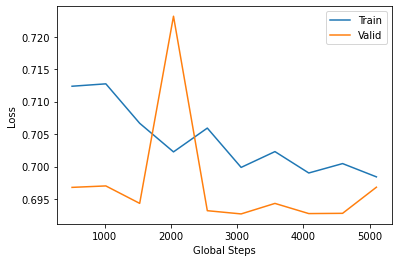

In [11]:
# 오차 정보를 그래프로 확인
train_loss_list, valid_loss_list, global_steps_list = load_metrics('../chap10/data/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [12]:
# 모델 평가 함수 정의
def evaluate(model, test_loader):
    y_pred = []  # 예측값을 저장할 리스트
    y_true = []  # 실제값을 저장할 리스트

    model.eval()  # 모델을 평가 모드로 설정
    with torch.no_grad():  # 기울기 계산 중지
        for text, label in test_loader:
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]  # 텍스트를 토큰화
            padded_list = [e + [0] * (512 - len(e)) for e in encoded_list]  # 패딩 추가
        
            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)  # 데이터를 디바이스로 이동
            labels = label.clone().detach()  
            output = model(sample, labels=labels)  # 모델에 입력하여 출력 계산
            
            _, output = output  # 출력값과 손실값 분리
            y_pred.extend(torch.argmax(output, 1).tolist())  # 예측값을 리스트에 추가
            y_true.extend(labels.tolist())  # 실제값을 리스트에 추가
                    
    print('Classification 결과:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))  # 분류 결과 출력
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])  # 혼동 행렬 계산
    ax = plt.subplot()  # 서브플롯 생성
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt="d")  # 혼동 행렬을 히트맵으로 출력
    
    ax.set_title('Confusion Matrix')  # 제목 설정
    ax.set_xlabel('Predicted Labels')  # x축 라벨 설정
    ax.set_ylabel('True Labels')  # y축 라벨 설정
    ax.xaxis.set_ticklabels(['0', '1'])  # x축 틱 라벨 설정
    ax.yaxis.set_ticklabels(['0', '1'])  # y축 틱 라벨 설정


Model loaded from <== e:/torch/chap10/data/model.pt


<ipython-input-12-f9df6714cef0>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)


Classification 결과:
              precision    recall  f1-score   support

           1     0.5091    1.0000    0.6747       558
           0     0.0000    0.0000    0.0000       538

    accuracy                         0.5091      1096
   macro avg     0.2546    0.5000    0.3374      1096
weighted avg     0.2592    0.5091    0.3435      1096



e:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


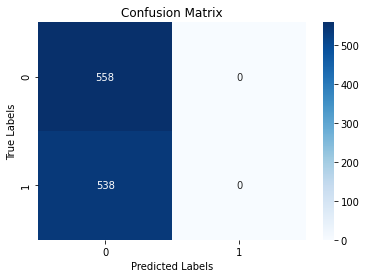

In [14]:
# 모델 평가
best_model = model.to(device)
load_checkpoint('../chap10/model.pt', best_model)
evaluate(best_model, test_loader)

# 10.3 한국어 임베딩

In [1]:
# 라이브러리 불러오기
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased') # 한국어를 위한 버트 토크나이저 'bert-base-multilingual-cased' 내려받기

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

C:\Users\chohj\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chohj\.cache\huggingface\hub\models--bert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

C:\Users\chohj\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [2]:
# 문장의 토크나이징
text = "나는 파이토치를 이용한 딥러닝을 학습중이다."
marked_text = "[CLS] " + text + " [SEP]" # 문장의 시작은 [CLS], 문장의 끝은 [SEP]로 형태를 맞춘다
tokenized_text = tokenizer.tokenize(marked_text) # 사전 훈련된 버트 토크나이저를 이용해서 문장을 단어로 쪼갠다
print(tokenized_text)

['[CLS]', '나는', '파', '##이', '##토', '##치를', '이', '##용한', '딥', '##러', '##닝', '##을', '학', '##습', '##중', '##이다', '.', '[SEP]']


In [4]:
# 모델을 훈련시킬 텍스트 정의
text = "과수원에 사과가 많았다." \
       "친구가 나에게 사과했다."\
       "백설공주는 독이 든 사과를 먹었다."

marked_text = "[CLS] " + text + " [SEP]" # 앞에는 [CLS], 뒤에는 [SEP]를 추가
tokenized_text = tokenizer.tokenize(marked_text) # 문장을 토큰으로 분리
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text) # 토큰 문자열에 인덱스를 매핑

for tup in zip(tokenized_text, indexed_tokens): # 단어와 인덱스를 출력
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
과             8,898
##수          15,891
##원에         108,280
사             9,405
##과          11,882
##가          11,287
많             9,249
##았다         27,303
.               119
친             9,781
##구          17,196
##가          11,287
나             8,982
##에게         26,212
사             9,405
##과          11,882
##했다         12,490
.               119
백             9,331
##설          31,928
##공          28,000
##주는         100,633
독             9,088
##이          10,739
든             9,115
사             9,405
##과          11,882
##를          11,513
먹             9,266
##었다         17,706
.               119
[SEP]           102


In [5]:
# 문장 인식 단위 지정
segments_ids = [1] * len(tokenized_text)
print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [6]:
# 데이터를 텐서로 변환
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [8]:
# 모델 생성
model = BertModel.from_pretrained('bert-base-multilingual-cased',
                                  output_hidden_states = True,)

model.eval() # 모델을 평가 모드로 설정

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [9]:
# 모델 훈련
with torch.no_grad(): # 모델을 평가할 때 기울기 사용 X
    outputs = model(tokens_tensor, segments_tensors)
    hidden_states = outputs[2] # 네트워크의 은닉 상태를 가져온다

In [10]:
# 모델의 은닉 상태 정보 확인
print ("계층 수:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("배치 수:", len(hidden_states[layer_i]))
batch_i = 0

print ("토큰 수:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("은닉층 유닛 수:", len(hidden_states[layer_i][batch_i][token_i]))

계층 수: 13   (initial embeddings + 12 BERT layers)
배치 수: 1
토큰 수: 33
은닉층 유닛 수: 768


In [11]:
print('은닉 상태의 유형: ', type(hidden_states))
print('각 계층에서의 텐서 형태: ', hidden_states[0].size())

은닉 상태의 유형:  <class 'tuple'>
각 계층에서의 텐서 형태:  torch.Size([1, 33, 768])


In [14]:
# 텐서의 형태 변경
token_embeddings = torch.stack(hidden_states, dim=0) # 각 계층의 텐서 결합은 stack을 사용
token_embeddings.size() # 최종 텐서의 형태를 출력

torch.Size([13, 1, 33, 768])

In [15]:
token_embeddings = torch.squeeze(token_embeddings, dim=1) # 배치 차원(1) 제거
token_embeddings.size() # 배치 차원 제거 후 최종 텐서의 형태를 출력

torch.Size([13, 33, 768])

In [16]:
# 텐서 차원 변경
token_embeddings = token_embeddings.permute(1,0,2)
token_embeddings.size()

torch.Size([33, 13, 768])

In [17]:
# 각 단어에 대한 벡터 형태 확인
token_vecs_cat = []  # 형태가 [33 x (33 x 768)]인 벡터를 [33 x 25344]로 변경하여 저장

# token_embeddings는 [33 x 12 x 768] 형태의 텐서를 갖는다
for token in token_embeddings:
    # 마지막 4개의 레이어의 은닉 상태 벡터를 이어붙인다
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    token_vecs_cat.append(cat_vec)

# 결과 벡터의 형태를 출력
print('형태는: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

형태는: 33 x 3072


In [18]:
# 계층을 결합하여 최종 단어 벡터 생성
token_vecs_sum = [] # [33x768] 형태의 토큰을 벡터로 저장
for token in token_embeddings: # 'token_embeddings'는 [33x12x768] 형태의 토큰을 갖는다
    sum_vec = torch.sum(token[-4:], dim=0) # 마지막 4개 계층의 벡터를 합산
    token_vecs_sum.append(sum_vec) # sum_vec를 사용하여 토큰을 표현
print ('형태는: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

형태는: 33 x 768


In [19]:
# 문장 벡터
token_vecs = hidden_states[-2][0] #[33x768]
sentence_embedding = torch.mean(token_vecs, dim=0)
print ("최종 임베딩 벡터의 형태:", sentence_embedding.size())

최종 임베딩 벡터의 형태: torch.Size([768])


In [17]:
# 토큰과 인덱스 출력
for i, token_str in enumerate(tokenized_text): # torkenized_text에서 토큰들을 꺼내서 인덱스와 함께 출력
    print (i, token_str)

0 [CLS]
1 과
2 ##수
3 ##원에
4 사
5 ##과
6 ##가
7 많
8 ##았다
9 .
10 친
11 ##구
12 ##가
13 나
14 ##에게
15 사
16 ##과
17 ##했다
18 .
19 백
20 ##설
21 ##공
22 ##주는
23 독
24 ##이
25 든
26 사
27 ##과
28 ##를
29 먹
30 ##었다
31 .
32 [SEP]


In [18]:
# 단어 벡터 확인
print("사과가 많았다", str(token_vecs_sum[6][:5]))
print("나에게 사과했다", str(token_vecs_sum[10][:5]))
print("사과를 먹었다", str(token_vecs_sum[19][:5]))

사과가 많았다 tensor([-0.5844, -4.0836,  0.4906,  0.8915, -1.8054])
나에게 사과했다 tensor([-0.8631, -3.4047, -0.7351,  0.9805, -2.6700])
사과를 먹었다 tensor([ 0.6756, -0.3618,  0.0586,  2.2050, -2.4193])


In [20]:
# 코사인 유사도 계산
from scipy.spatial.distance import cosine
diff_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[27]) # '사과가 많았다'와 '나에게 사과했다'에서 단어 '사과' 사이의 코사인 유사도 계싼
same_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[16]) # '사과가 많았다'와 '사과를 먹었다'에 있는 '사과'사이의 코사인 유사도를 계산
print('*유사한* 의미에 대한 벡터 유사성:  %.2f' % same_apple)
print('*다른* 의미에 대한 벡터 유사성:  %.2f' % diff_apple)

*유사한* 의미에 대한 벡터 유사성:  0.86
*다른* 의미에 대한 벡터 유사성:  0.91
